<a href="https://colab.research.google.com/github/Francisco2963/Ingenier-a_de_Caracter-sticas-Transformaciones_de_Variables/blob/main/Ingenier%C3%ADa_de_Caracter%C3%ADsticas_Transformaciones_de_Variables_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [ ]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Home,0
Price,0
SqFt,0
Bedrooms,0
Bathrooms,0
Offers,0
Brick,0
Neighborhood,0


 Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.

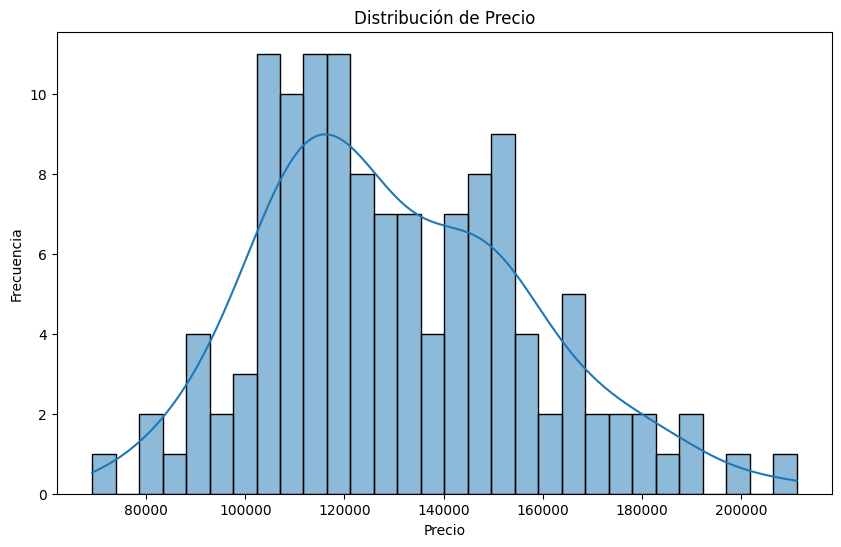

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribución de Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

plt.show()

COMENTARIO

La distribución no es simétrica y está sesgada a la derecha, lo que sugiere que la mayoría de las casas tienen precios más bajos, pero existen algunos precios elevados que podrían ser outliers.

Identificacion de outliers

In [ ]:
def calcular_outliers(df, columna):
  if df[columna].dtype == 'object':
    return None, None, None, None
  else:

   Q1 = df[columna].quantile(0.25)
   Q3 = df[columna].quantile(0.75)
   IQR = Q3 - Q1
   outliers = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
   return outliers, Q1, Q3, IQR

outliers_Home, Q1_Home, Q3_Home, IQR_Home = calcular_outliers(df, 'Home')
outliers_Price, Q1_Price, Q3_Price, IQR_Price = calcular_outliers(df, 'Price')
outliers_SqFt, Q1_SqFt, Q3_SqFt, IQR_SqFt = calcular_outliers(df, 'SqFt')
outliers_Bedrooms, Q1_Bedrooms, Q3_Bedrooms, IQR_Bedrooms = calcular_outliers(df, 'Bedrooms')
outliers_Bathrooms, Q1_Bathrooms, Q3_Bathrooms, IQR_Bathrooms = calcular_outliers(df, 'Bathrooms')
outliers_Offers, Q1_Offers, Q3_Offers, IQR_Offers = calcular_outliers(df, 'Offers')



print(f'Outliers en Home: \n{len(outliers_Home)}')

print(f'Outliers en Price: \n{len(outliers_Price)}')

print(f'Outliers en SqFt: \n{len(outliers_SqFt)}')

print(f'Outliers en Bedrooms: \n{len(outliers_Bedrooms)}')

print(f'Outliers en Bathrooms: \n{len(outliers_Bathrooms)}')

print(f'Outliers en Offers: \n{len(outliers_Offers)}')




Outliers en Home: 
0
Outliers en Price: 
1
Outliers en SqFt: 
2
Outliers en Bedrooms: 
61
Outliers en Bathrooms: 
0
Outliers en Offers: 
4


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

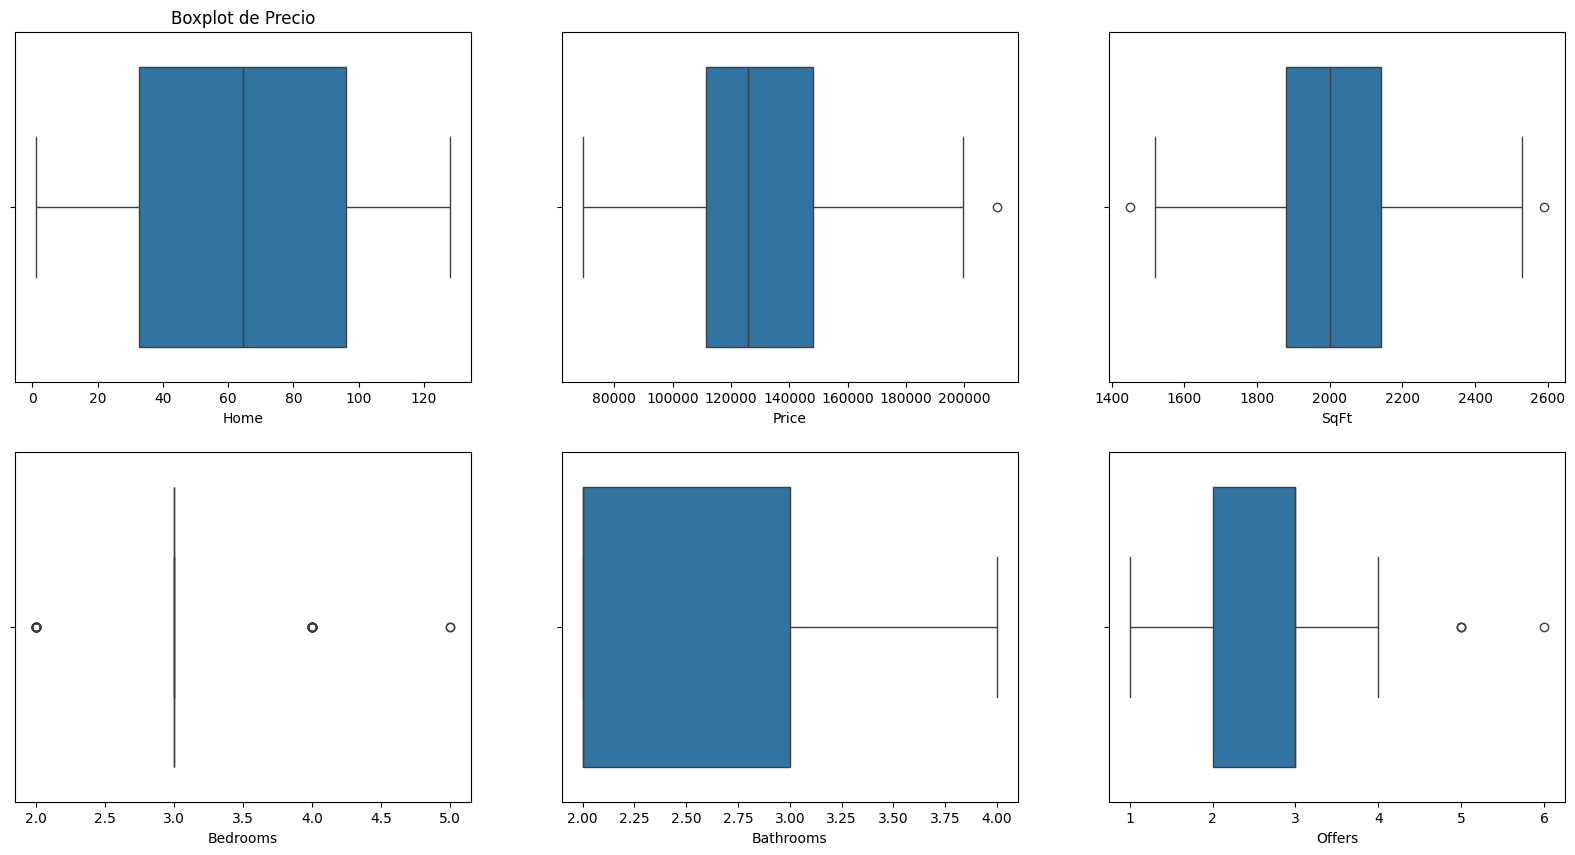

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
sns.boxplot(x=df['Home'])
plt.title('Boxplot de Precio')
plt.xlabel('Home')

plt.subplot(2,3,2)
sns.boxplot(x=df['Price'])
plt.xlabel('Price')

plt.subplot(2,3,3)
sns.boxplot(x=df['SqFt'])
plt.xlabel('SqFt')

plt.subplot(2,3,4)
sns.boxplot(x=df['Bedrooms'])
plt.xlabel('Bedrooms')

plt.subplot(2,3,5)
sns.boxplot(x=df['Bathrooms'])
plt.xlabel('Bathrooms')

plt.subplot(2,3,6)
sns.boxplot(x=df['Offers'])
plt.xlabel('Offers')


plt.show()

In [ ]:
# Tranformacion logaritmica de las variables 'Price' y 'SqFt' para reducir la influencia de outliers

df['LogPrice'] = np.log(df['Price'] + 1)
df['LogSqFt'] = np.log(df['SqFt'] + 1)

Price y SqFt se transforman usando la función np.log para reducir la dispersión provocada por valores extremos. Al ser valores positivos, se suma una constante pequeña (1) para evitar problemas de logaritmo de cero.



https://saturncloud.io/blog/what-are-logarithmic-returns-and-how-to-calculate-them-in-pandas-dataframe/

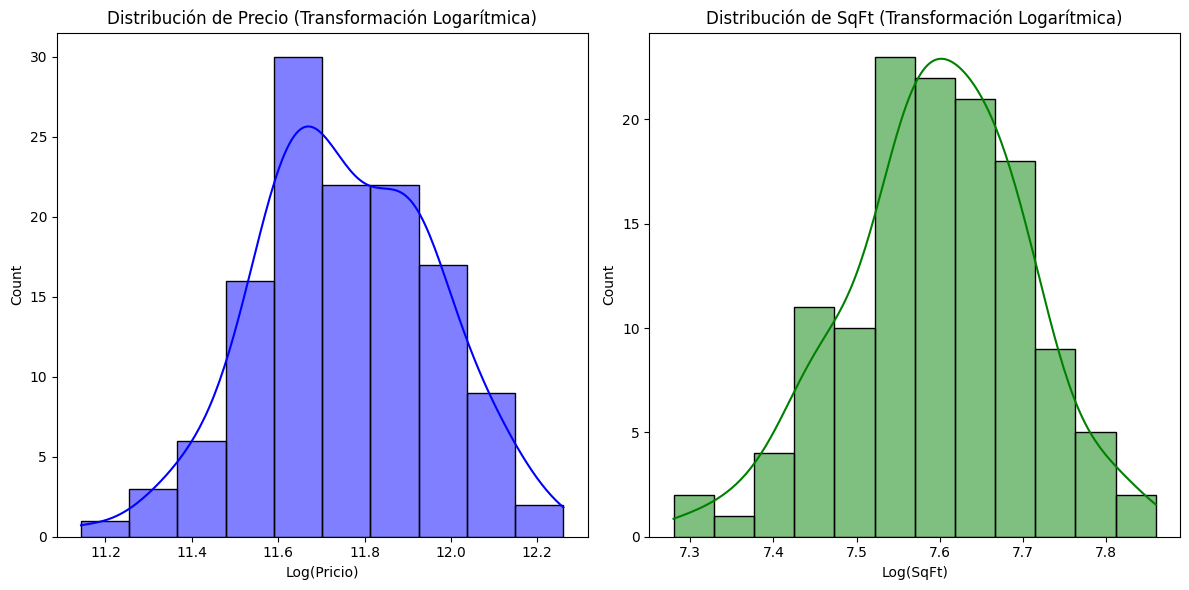

In [ ]:
# Visualización de las variables transformadas
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['LogPrice'], kde=True, ax=ax[0], color='blue')
ax[0].set_title('Distribución de Precio (Transformación Logarítmica)')
ax[0].set_xlabel('Log(Pricio)')

sns.histplot(df['LogSqFt'], kde=True, ax=ax[1], color='green')
ax[1].set_title('Distribución de SqFt (Transformación Logarítmica)')
ax[1].set_xlabel('Log(SqFt)')

plt.tight_layout()
plt.show()

In [ ]:
# Outliers identificados previamente
# Remover filas con `Bedrooms` <= 2 o >= 5
df = df[(df['Bedrooms'] > 2) & (df['Bedrooms'] < 5)]

In [ ]:
# Remover filas con `Offers` > 4 (outliers identificados en el boxplot)
df = df[df['Offers'] <= 4]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


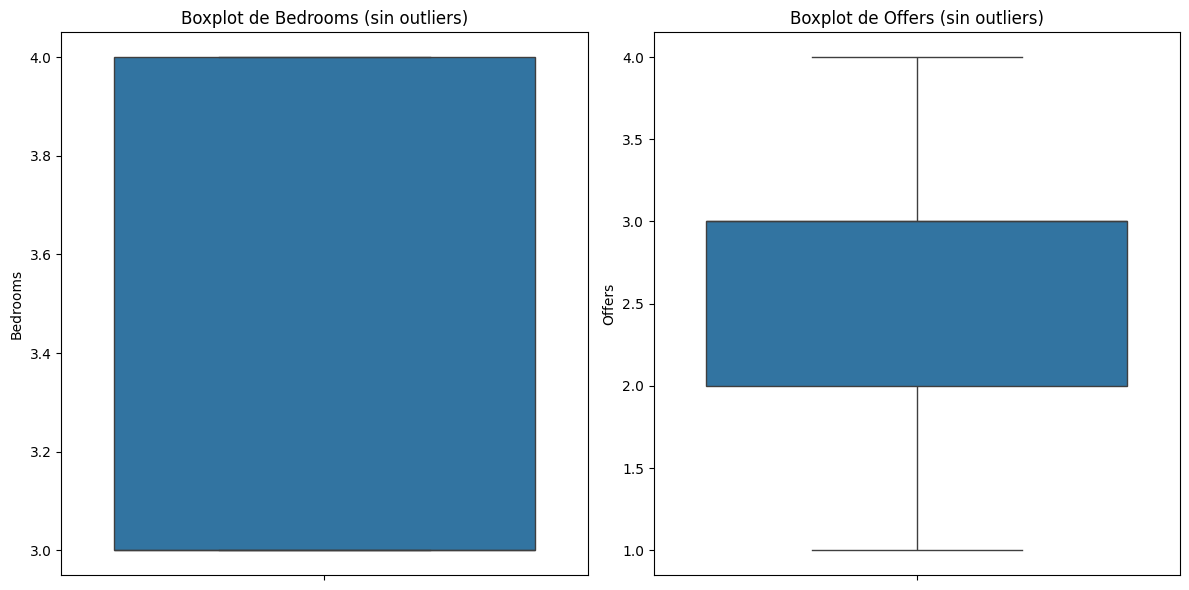

In [ ]:
# Verificar las distribuciones después de las transformaciones y eliminaciones
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y=df['Bedrooms'], ax=ax[0])
ax[0].set_title('Boxplot de Bedrooms (sin outliers)')

sns.boxplot(y=df['Offers'], ax=ax[1])
ax[1].set_title('Boxplot de Offers (sin outliers)')

plt.tight_layout()
plt.show()

Aplica transformaciones logarítmicas a variables sesgadas como el «SalePrice» y otras variables numéricas que tengan una distribución sesgada.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 1 to 127
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Home          92 non-null     int64  
 1   Price         92 non-null     int64  
 2   SqFt          92 non-null     int64  
 3   Bedrooms      92 non-null     int64  
 4   Bathrooms     92 non-null     int64  
 5   Offers        92 non-null     int64  
 6   Brick         92 non-null     object 
 7   Neighborhood  92 non-null     object 
 8   LogPrice      92 non-null     float64
 9   LogSqFt       92 non-null     float64
dtypes: float64(2), int64(6), object(2)
memory usage: 7.9+ KB


In [ ]:
# Aplicar One-Hot Encoding a las variables categóricas 'Brick' y 'Neighborhood'
df_encoded = pd.get_dummies(df, columns=['Brick', 'Neighborhood'], drop_first=True)

# Mostrar las primeras filas del DataFrame resultante
df_encoded.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,LogPrice,LogSqFt,Brick_Yes,Neighborhood_North,Neighborhood_West
1,2,114200,2030,4,2,3,11.645715,7.616284,False,False,False
2,3,114800,1740,3,2,1,11.650955,7.462215,False,False,False
3,4,94700,1980,3,2,3,11.458480,7.591357,False,False,False
4,5,119800,2130,3,3,3,11.693587,7.664347,False,False,False
5,6,114600,1780,3,2,2,11.649212,7.484930,False,True,False


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 1 to 127
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Home                92 non-null     int64  
 1   Price               92 non-null     int64  
 2   SqFt                92 non-null     int64  
 3   Bedrooms            92 non-null     int64  
 4   Bathrooms           92 non-null     int64  
 5   Offers              92 non-null     int64  
 6   LogPrice            92 non-null     float64
 7   LogSqFt             92 non-null     float64
 8   Brick_Yes           92 non-null     bool   
 9   Neighborhood_North  92 non-null     bool   
 10  Neighborhood_West   92 non-null     bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 6.7 KB


In [ ]:
df_encoded['Brick_Yes'] = df_encoded['Brick_Yes'].astype(int)
df_encoded['Neighborhood_North'] = df_encoded['Neighborhood_North'].astype(int)
df_encoded['Neighborhood_West'] = df_encoded['Neighborhood_West'].astype(int)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 1 to 127
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Home                92 non-null     int64  
 1   Price               92 non-null     float64
 2   SqFt                92 non-null     float64
 3   Bedrooms            92 non-null     float64
 4   Bathrooms           92 non-null     float64
 5   Offers              92 non-null     float64
 6   LogPrice            92 non-null     float64
 7   LogSqFt             92 non-null     float64
 8   Brick_Yes           92 non-null     int64  
 9   Neighborhood_North  92 non-null     int64  
 10  Neighborhood_West   92 non-null     int64  
dtypes: float64(7), int64(4)
memory usage: 8.6 KB


# Normalización/Estandarización

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Definir las columnas numéricas a estandarizar
numerical_cols = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'LogPrice', 'LogSqFt']

In [ ]:
scaler = StandardScaler()

In [ ]:
# Ajustar y transformar las columnas numéricas
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Mostrar las primeras filas del DataFrame estandarizado
df_encoded.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,LogPrice,LogSqFt,Brick_Yes,Neighborhood_North,Neighborhood_West
1,2,-0.792425,-0.027323,1.473911,-1.044466,0.419855,-0.745797,0.022228,0,0,0
2,3,-0.769976,-1.456716,-0.678467,-1.044466,-1.726072,-0.719780,-1.529894,0,0,0
3,4,-1.522017,-0.273770,-0.678467,-1.044466,0.419855,-1.675433,-0.228887,0,0,0
4,5,-0.582901,0.465571,-0.678467,0.957427,0.419855,-0.508110,0.506426,0,0,0
5,6,-0.777459,-1.259559,-0.678467,-1.044466,-0.653108,-0.728437,-1.301054,0,1,0


Crea variables polinómicas a partir de las variables numéricas, como el tamaño total de la casa. Por ejemplo, agrega el cuadrado o el cubo de estas variables como nuevas características para capturar posibles relaciones no lineales

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [ ]:
# Seleccionar las columnas numéricas para crear las variables polinómicas
numerical_features = ['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'LogPrice', 'LogSqFt']

In [ ]:
# Crear un objeto PolynomialFeatures para generar términos cuadráticos y cúbicos
poly = PolynomialFeatures(degree=3, include_bias=False)

# Ajustar y transformar las variables numéricas para obtener términos polinómicos
polynomial_features = poly.fit_transform(df_encoded[numerical_features])

In [ ]:
# Crear un nuevo DataFrame con las características polinómicas
polynomial_df = pd.DataFrame(polynomial_features, columns=poly.get_feature_names_out(numerical_features))

# Combinar el DataFrame original con el nuevo DataFrame de características polinómicas
df_final = pd.concat([df_encoded.reset_index(drop=True), polynomial_df], axis=1)

# Visualiza las primeras filas del DataFrame resultante
df_final.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,LogPrice,LogSqFt,Brick_Yes,Neighborhood_North,...,Offers^3,Offers^2 LogPrice,Offers^2 LogSqFt,Offers LogPrice^2,Offers LogPrice LogSqFt,Offers LogSqFt^2,LogPrice^3,LogPrice^2 LogSqFt,LogPrice LogSqFt^2,LogSqFt^3
0,2,-0.792425,-0.027323,1.473911,-1.044466,0.419855,-0.745797,0.022228,0,0,...,0.074012,-0.131468,0.003918,0.233529,-0.006960,0.000207,-0.414823,0.012364,-0.000368,0.000011
1,3,-0.769976,-1.456716,-0.678467,-1.044466,-1.726072,-0.719780,-1.529894,0,0,...,-5.142531,-2.144458,-4.558051,-0.894249,-1.900728,-4.040001,-0.372906,-0.792612,-1.684699,-3.580830
2,4,-1.522017,-0.273770,-0.678467,-1.044466,0.419855,-1.675433,-0.228887,0,0,...,0.074012,-0.295343,-0.040348,1.178566,0.161008,0.021996,-4.703067,-0.642503,-0.087775,-0.011991
3,5,-0.582901,0.465571,-0.678467,0.957427,0.419855,-0.508110,0.506426,0,0,...,0.074012,-0.089569,0.089272,0.108397,-0.108037,0.107679,-0.131182,0.130747,-0.130314,0.129882
4,6,-0.777459,-1.259559,-0.678467,-1.044466,-0.653108,-0.728437,-1.301054,0,1,...,-0.278584,-0.310715,-0.554965,-0.346553,-0.618975,-1.105544,-0.386524,-0.690367,-1.233056,-2.202349


Estandariza las variables numéricas para que todas tengan la misma escala, lo cual es útil cuando se entrenan modelos de regresión o algoritmos basados en distancia como KNN.

In [ ]:
# Selecciona las columnas numéricas para estandarizar
numeric_columns = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# Inicializa el escalador
scaler = StandardScaler()

# Ajusta y transforma las variables numéricas
df_final[numeric_columns] = scaler.fit_transform(df_final[numeric_columns])

In [ ]:
df_final.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,LogPrice,LogSqFt,Brick_Yes,Neighborhood_North,...,Offers^3,Offers^2 LogPrice,Offers^2 LogSqFt,Offers LogPrice^2,Offers LogPrice LogSqFt,Offers LogSqFt^2,LogPrice^3,LogPrice^2 LogSqFt,LogPrice LogSqFt^2,LogSqFt^3
0,-1.641838,-0.792425,-0.027323,1.473911,-1.044466,0.419855,-0.745797,0.022228,-0.678467,-0.594089,...,0.146341,-0.152830,-0.015519,0.005417,-0.196534,-0.111903,-0.051575,0.065454,0.032427,-0.013830
1,-1.614884,-0.769976,-1.456716,-0.678467,-1.044466,-1.726072,-0.719780,-1.529894,-0.678467,-0.594089,...,-2.024675,-1.501377,-2.958252,-0.662852,-2.259917,-2.423486,-0.038475,-0.319892,-0.781894,-1.165764
2,-1.587930,-1.522017,-0.273770,-0.678467,-1.044466,0.419855,-1.675433,-0.228887,-0.678467,-0.594089,...,0.146341,-0.262614,-0.044073,0.565402,-0.013521,-0.099437,-1.391738,-0.248034,-0.009831,-0.017691
3,-1.560976,-0.582901,0.465571,-0.678467,0.957427,0.419855,-0.508110,0.506426,-0.678467,-0.594089,...,0.146341,-0.124761,0.039539,-0.068731,-0.306664,-0.050413,0.037069,0.122124,-0.030397,0.027949
4,-1.534023,-0.777459,-1.259559,-0.678467,-1.044466,-0.653108,-0.728437,-1.301054,-0.678467,1.683251,...,-0.000401,-0.272912,-0.376031,-0.338313,-0.863363,-0.744552,-0.042731,-0.270946,-0.563539,-0.722315


# MODELO

Evaluación de las transformaciones:

  – Aplica un modelo de regresión antes y después de las transformaciones para evaluar su impacto en el rendimiento del modelo.

  – Compara métricas como el RMSE (Root Mean Squared Error) y el R-squared para ver si las transformaciones logarítmicas y polinómicas han mejorado la predicción del precio de las casas.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Antes de las transformaciones

In [ ]:
# 1. Dividir el DataFrame en características (X) y variable objetivo (y)
X = df_final.drop(['Price','LogPrice'], axis=1)
y = df_final['Price']

In [ ]:
# 2. Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Ajustar el modelo de regresion lineal antes de las transformaciones
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Calcular el RMSE y R-squared
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred))
r2_before = r2_score(y_test, y_pred)

print(f"RMSE antes de transformaciones: {rmse_before:.2f}")
print(f"R-squared antes de transformaciones: {r2_before:.2f}")

RMSE antes de transformaciones: 0.06
R-squared antes de transformaciones: 1.00


Despues de las transformaciones

In [ ]:
# Ajustamos el modelo utilizando LogPrice
y_log = df_final['LogPrice']

In [ ]:
# Re-dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)


In [ ]:
# Ajustamos el modelo de RL con LogProce
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)

In [ ]:
# Calcular RMSE y R-squared para el modelo con transformaciones
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2_after = r2_score(y_test, y_pred_log)

print(f"RMSE después de transformaciones: {rmse_after:.2f}")
print(f"R-squared después de transformaciones: {r2_after:.2f}")

RMSE después de transformaciones: 0.01
R-squared después de transformaciones: 1.00
